In [224]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,  cross_val_predict, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error

In [47]:
items = pd.read_csv('../items.csv')
item_cat = pd.read_csv('../item_categories.csv')

sales_train = pd.read_csv('../sales_train.csv')
shops = pd.read_csv('../shops.csv')

#sales_test = pd.read_csv('../test.csv')

In [3]:
#    - Mostrar información sobre las columnas
print(sales_train.info)
#    - Mostrar indicadores estadísticos sobre las columnas
print(sales_train.describe)
#    - Mostrar los tipos de las columnas
print(sales_train.dtypes)
#    - Obtener una matriz numpy con los valores de los datos

<bound method DataFrame.info of                date  date_block_num  shop_id  item_id  item_price  \
0        02.01.2013               0       59    22154      999.00   
1        03.01.2013               0       25     2552      899.00   
2        05.01.2013               0       25     2552      899.00   
3        06.01.2013               0       25     2554     1709.05   
4        15.01.2013               0       25     2555     1099.00   
...             ...             ...      ...      ...         ...   
2935844  10.10.2015              33       25     7409      299.00   
2935845  09.10.2015              33       25     7460      299.00   
2935846  14.10.2015              33       25     7459      349.00   
2935847  22.10.2015              33       25     7440      299.00   
2935848  03.10.2015              33       25     7460      299.00   

         item_cnt_day  
0                 1.0  
1                 1.0  
2                -1.0  
3                 1.0  
4                 1

Para empezar, agrupamos los datos por mes, para obtener el numero total de ventas de cada item en cada tienda por mes.

In [48]:
sales_train = sales_train.groupby(['date_block_num','shop_id', 'item_id', 'item_price']).sum().reset_index().rename(columns={"item_cnt_day":"item_cnt_month"})

In [49]:
X = sales_train[['date_block_num','shop_id','item_id', 'item_price']]
y = sales_train[['item_cnt_month']]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train = X_train.reset_index()[['date_block_num','shop_id','item_id', 'item_price']]
X_test = X_test.reset_index()[['date_block_num','shop_id','item_id', 'item_price']]
y_train = y_train.reset_index()[['item_cnt_month']]
y_test= y_test.reset_index()[['item_cnt_month']]

In [7]:
X_train

,date_block_num,shop_id,item_id,item_price
0,23,38,2252,399.0
1,12,27,3673,999.0
2,2,13,18215,110.0
3,23,31,4584,498.0
4,19,35,2916,2999.0
...,...,...,...,...
1391212,2,23,16608,149.0
1391213,16,26,3224,599.0
1391214,1,45,2303,1399.0
1391215,26,50,21767,169.0


In [8]:
y_train

,item_cnt_month
0,5.0
1,3.0
2,1.0
3,1.0
4,1.0
...,...
1391212,1.0
1391213,1.0
1391214,2.0
1391215,1.0


**REGRESION LINEAL** sobre todo el conjunto de datos

In [51]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train,y_train)

In [52]:
y_pred = reg.predict(X_test)

In [53]:
mean_absolute_error(y_test, y_pred)

1.5208604086550395

In [54]:
r2_score(y_test, y_pred)

0.00027275248726688073

In [13]:
pd.options.display.max_rows = 100

In [61]:
X_test.assign(y_real= y_test).assign(y_pred= y_pred)[50:100]

,date_block_num,shop_id,item_id,item_price,y_real,y_pred
50,24,31,1201,299.000000,1.0,2.081856
51,30,6,17840,148.000000,1.0,2.013896
52,21,59,7937,3499.000000,1.0,2.273594
53,2,4,1315,449.000000,1.0,2.086746
54,9,52,4870,799.000000,8.0,2.126360
55,31,42,1881,1799.500000,1.0,2.170578
56,20,41,6504,2332.333333,3.0,2.197495
57,5,14,1986,899.000000,1.0,2.116151
58,23,7,1753,299.000000,1.0,2.065225
59,28,19,16055,599.000000,2.0,2.054325


In [63]:
#plt.plot(X_test['date_block_num'], y_test)
plt.plot(X_test['date_block_num'], y_pred)

OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 432x288 with 1 Axes>

**ARBOL DE DECISION** sobre todo el conjunto de datos

In [197]:
from sklearn.tree import DecisionTreeRegressor
DTR = DecisionTreeRegressor(random_state = 0, max_depth=12).fit(X_train,y_train)

In [198]:
y_pred = DTR.predict(X_train)

In [199]:
mean_absolute_error(y_train, y_pred)

1.2442111795127002

In [200]:
r2_score(y_train, y_pred)

0.7463442113881944

In [201]:
y_pred = DTR.predict(X_test)

In [202]:
mean_absolute_error(y_test, y_pred)

1.2856022401764788

In [203]:
r2_score(y_test, y_pred)

0.520347923529678

In [204]:
X_test.assign(y_real= y_test).assign(y_pred= y_pred)[50:100]

,date_block_num,shop_id,item_id,item_price,y_real,y_pred
50,24,31,1201,299.000000,1.0,1.431549
51,30,6,17840,148.000000,1.0,1.182350
52,21,59,7937,3499.000000,1.0,1.935657
53,2,4,1315,449.000000,1.0,1.821006
54,9,52,4870,799.000000,8.0,4.731508
55,31,42,1881,1799.500000,1.0,1.472661
56,20,41,6504,2332.333333,3.0,2.351812
57,5,14,1986,899.000000,1.0,3.242540
58,23,7,1753,299.000000,1.0,1.742644
59,28,19,16055,599.000000,2.0,1.540350


**ARBOL DE DESICION** separando tienda y articulo

In [217]:
def tree_reg(item_id, shop_id, regressor):
    Xy = sales_train.loc[sales_train['shop_id'] == shop_id].loc[sales_train['item_id'] == item_id][['date_block_num', 'item_price', 'item_cnt_month']]
    X=Xy[['date_block_num', 'item_price']]
    y = Xy.item_cnt_month

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
    X_train = X_train.sort_index()
    X_test = X_test.sort_index()
    y_train = y_train.sort_index()
    y_test= y_test.sort_index()

    reg = regressor.fit(X_train,y_train)
    
    y_pred = reg.predict(X_test)

    print("MAE: ", mean_absolute_error(y_test, y_pred))
    print("R2: ", r2_score(y_test, y_pred))


    plt.plot(X_test['date_block_num'],y_test)
    plt.plot(X_test['date_block_num'],y_pred)
    
    print(X_test.assign(y_real= y_test).assign(y_pred = y_pred)[:100])
    
    return reg

In [245]:
#shop_id: 15 	item_id:1855
items[items['item_id']==2574]['item_name']

2574    DEL REY LANA  Born To Die  The Paradise Editio...
Name: item_name, dtype: object

MAE:  1.1333333333333333
R2:  -1.4355179704016914


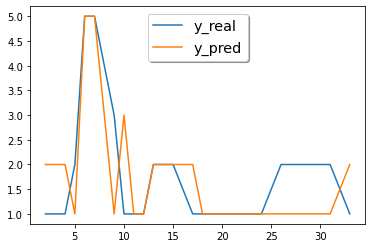

In [279]:
shop_id = 15
item_id = 2574

Xy = sales_train.loc[sales_train['shop_id'] == shop_id].loc[sales_train['item_id'] == item_id][['date_block_num', 'item_price', 'item_cnt_month']]
X = Xy[['date_block_num', 'item_price']]
y = Xy.item_cnt_month

reg = DecisionTreeRegressor(random_state = 0, max_depth=5)
#reg = LinearRegression()

y_pred = cross_val_predict(reg, X,y, cv=10)

print("MAE: ", abs(cross_val_score(reg, X,y, scoring='neg_mean_absolute_error').mean()))
print("R2: ", cross_val_score(reg, X,y).mean())

fig, ax = plt.subplots()

ax.plot(X['date_block_num'],y, label="y_real")
ax.plot(X['date_block_num'],y_pred, label="y_pred")

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

plt.show()

In [280]:
X.assign(y_real= y).assign(y_pred = y_pred)[:100]

,date_block_num,item_price,y_real,y_pred
142646,2,399.0,1.0,2.0
267642,4,399.0,1.0,2.0
324922,5,399.0,2.0,1.0
385393,6,399.0,5.0,5.0
446642,7,399.0,5.0,5.0
565110,9,399.0,3.0,1.0
618070,10,399.0,1.0,3.0
674146,11,399.0,1.0,1.0
743777,12,399.0,1.0,1.0
800367,13,399.0,2.0,2.0


                               item_name  item_id  item_category_id
1855  Battlefield 4 [PC, русская версия]     1855                30
MAE:  6.3809523809523805
R2:  -0.556561996779388
         date_block_num   item_price  y_real     y_pred
674082               11   798.958333    12.0   7.000000
743718               12   799.560000     1.0  22.000000
743719               12  1199.000000    25.0  16.000000
800299               13   729.027500     4.0   1.000000
800301               13  1199.000000     6.0   9.222222
1052692              18  1199.000000     7.0   9.222222
1243257              22   799.000000     8.0   9.222222


DecisionTreeRegressor(max_depth=5, random_state=0)

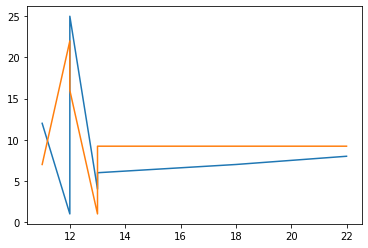

In [218]:
#shop_id: 15 	item_id:1855
print(items[items['item_id']==1855])
tree_reg(1855, 15, DecisionTreeRegressor(random_state = 0, max_depth=5))

MAE:  0.5
R2:  -1.6666666666666665


DecisionTreeRegressor(max_depth=5, random_state=0)

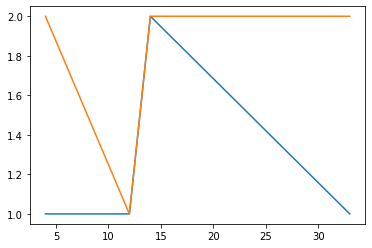

In [26]:
tree_reg(2574, 15)

In [27]:
pd.options.display.max_rows = 100

In [28]:
X_test.assign(y_real= y_test).assign(y_pred= y_pred)[:100]

,date_block_num,shop_id,item_id,item_price,y_real,y_pred
0,4,57,12497,249.000000,1.0,1.0
1,10,25,9553,199.000000,1.0,1.0
2,0,44,13484,13490.000000,1.0,1.0
3,2,31,18412,199.000000,1.0,1.0
4,2,35,1939,974.000000,2.0,3.0
5,5,24,13735,419.300000,1.0,1.0
6,19,57,10428,199.000000,1.0,1.0
7,17,15,1855,1199.000000,6.0,11.0
8,0,27,9728,199.000000,1.0,1.0
9,18,35,1855,1199.000000,2.0,2.0


**ARBOL DE DESICION** separando cada articulo

In [283]:
def tree_reg_item(item_id, regressor):
    Xy = sales_train.loc[sales_train['item_id'] == item_id].groupby(['date_block_num', 'item_price']).sum().reset_index()[['date_block_num', 'item_price', 'item_cnt_month']]
    X=Xy[['date_block_num', 'item_price']]
    y = Xy.item_cnt_month


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
    X_train = X_train.sort_index()
    X_test = X_test.sort_index()
    y_train = y_train.sort_index()
    y_test= y_test.sort_index()

    reg = regressor.fit(X_train,y_train)
    y_pred = reg.predict(X_test)

    print("MAE: ", mean_absolute_error(y_test, y_pred))
    print("R2: ", r2_score(y_test, y_pred))

    fig, ax = plt.subplots()

    ax.plot(X_test['date_block_num'],y_test, label="y_real")
    ax.plot(X_test['date_block_num'],y_pred, label="y_pred")

    legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

    return reg

MAE:  8.16
R2:  0.927991757028605


DecisionTreeRegressor(max_depth=5, random_state=0)

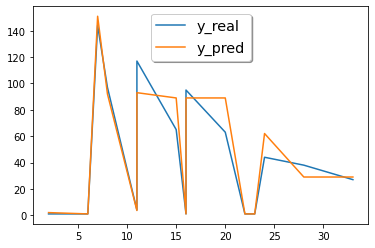

In [284]:
# item_id: 2574
items[items['item_id']==2574]
tree_reg_item(2574, DecisionTreeRegressor(random_state = 0, max_depth=5))

MAE:  33.54434328523817
R2:  0.19707820130563658


LinearRegression()

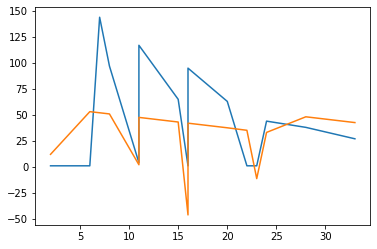

In [45]:
tree_reg_item(2574, LinearRegression())

In [31]:
X_test.assign(y_real= y_test).assign(y_pred= y_pred)[:100]

,date_block_num,shop_id,item_id,item_price,y_real,y_pred
0,4,57,12497,249.000000,1.0,1.0
1,10,25,9553,199.000000,1.0,1.0
2,0,44,13484,13490.000000,1.0,1.0
3,2,31,18412,199.000000,1.0,1.0
4,2,35,1939,974.000000,2.0,3.0
5,5,24,13735,419.300000,1.0,1.0
6,19,57,10428,199.000000,1.0,1.0
7,17,15,1855,1199.000000,6.0,11.0
8,0,27,9728,199.000000,1.0,1.0
9,18,35,1855,1199.000000,2.0,2.0


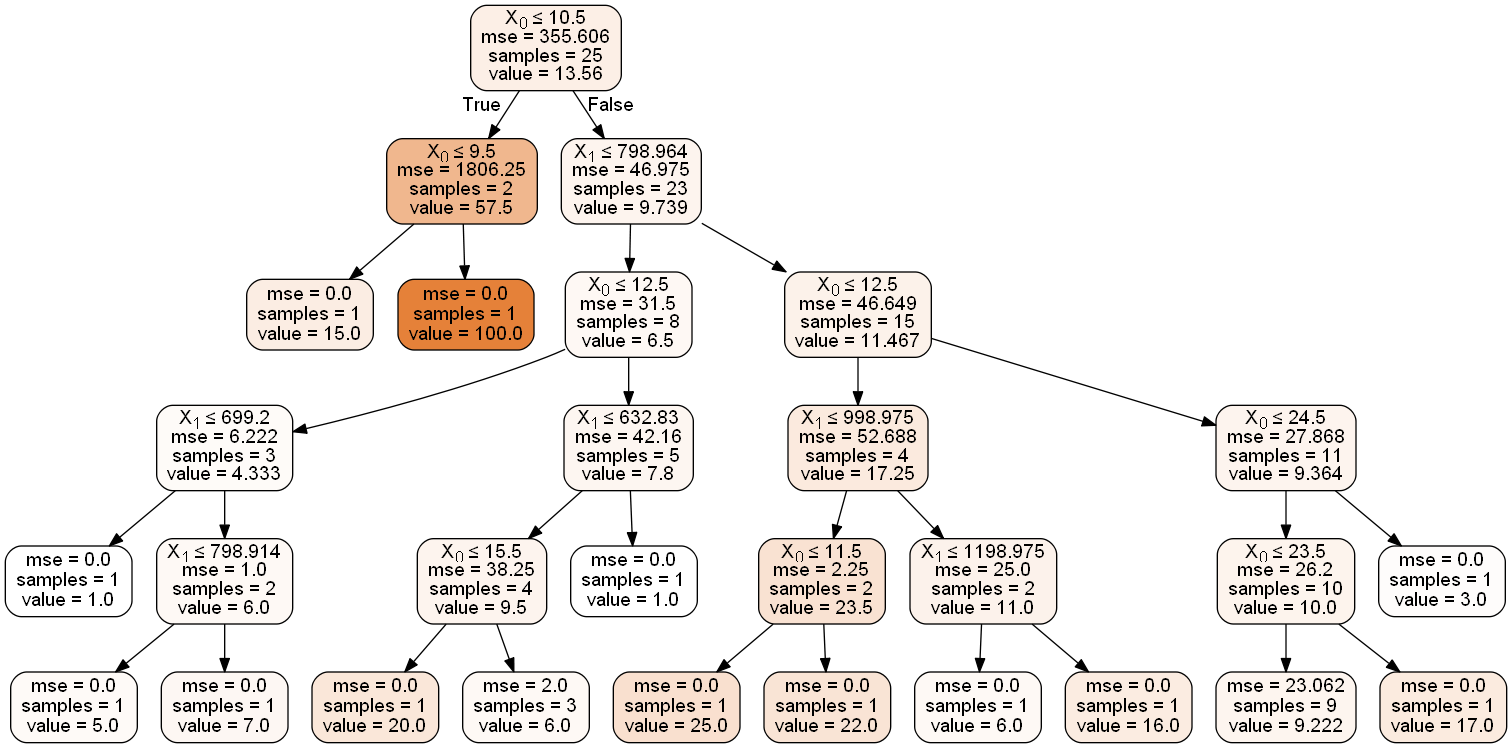

In [38]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

export_graphviz(reg, out_file=dot_data, max_depth=12,
filled=True, rounded=True,
special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())